# STAT 345: Nonparametric Statistics

## Lesson 03.1: The Quantile Test and the Sign Test

**Reading: Conover Sections 3.2 & 3.4**

*Prof. John T. Whelan*

Thursday 30 January 2025

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

- Lessons 03.1-03.2: nonparametric inferences which use the binomial distribution.

- Recall, for some $p^*\in[0,1]$, the $p^*$ quantile $x_{p^*}$ of a random variable $\color{royalblue}{X}$ is defined by
$$P({\color{royalblue}{X}}{\mathbin{<}}x_{p^*}) \le p^* \qquad\hbox{and}\qquad P({\color{royalblue}{X}}{\mathbin{>}}x_{p^*}) = 1-P({\color{royalblue}{X}}{\mathbin{\le}}x_{p^*})\le 1-p^*$$

- If $\color{royalblue}{X}$ is a continuous rv, $P({\color{royalblue}{X}}{\mathbin{\le}}x_{p^*})=P({\color{royalblue}{X}}{\mathbin{<}}x_{p^*})$ & the defn simplifies to $P({\color{royalblue}{X}}{\mathbin{\le}}x_{p^*})=p^*$

- We wish to use a sample $\{x_i\}=x_1,\ldots,x_n$ to make a statement about the $p^*$
quantile $x_{p^*}$, for a specified $p^*$.

- Null hypothesis $H_0$ specifies some value $x^*$ for the $p^*$ quantile, $H_0$: $x_{p^*}=x^*$.

- As usual, the alternative hypothesis can be upper-tailed ($H_1$: $x_{p^*}>x^*$), lower-tailed ($H_1$: $x_{p^*}<x^*$) or two-tailed ($H_1$: $x_{p^*}\ne x^*$).

## Tests Assuming Continuous Distributions

- If the sampling distribution is assumed to be continuous, $H_0$: $x_{p^*}=x^*$ is equivalent to
$P({\color{royalblue}{X}} \le x^*) = p^*$

- Construct test statistic ${\color{royalblue}{T}}$ which is the number of values in $\{{\color{royalblue}{X_i}}\}$ which are below $x^*$; $H_0$ says ${\color{royalblue}{T}}\sim\operatorname{Bin}(n,p^*)$.  Can then apply binomial methods from Lesson 02.2.

- E.g., consider $H_0$: $x_{0.6}=1$; $H_1$: $x_{0.6}\ne 1$ (two-sided) w/data

In [3]:
x_i=np.array([0.5103, 0.9597, 0.0861, 0.4118, 0.2941, 0.2506, 0.3237, 0.4470, 0.4915, 0.6421,
              0.5123, 0.8789, 0.3373, 1.6668, 0.1830, 0.8486, 0.5105, 0.6678, 0.2892, 0.3326,
              1.2161, 3.6242, 0.4207, 0.8942, 1.6524, 1.8217, 0.2444, 0.1984, 0.3115, 1.6670,
              0.2557, 0.5141, 3.0989, 0.6351, 0.8932, 0.4223, 0.8816, 1.3748, 0.1684, 1.0407])
n = len(x_i); n

40

Count number of values w/$x_i\le x^*$

In [4]:
pstar = 0.6; xstar = 1.
teststat = np.sum(x_i <= xstar); teststat

31

So $t=31$.  If $H_0$ is true, and 60th percentile is $1$, ${\color{royalblue}T}\sim\operatorname{Bin}(40,0.6)$, which has mean & std dev

In [5]:
mu = n*pstar; sigma = np.sqrt(n*pstar*(1-pstar)); mu, sigma

(24.0, 3.0983866769659336)

We may eventually use exact binomial probability, but construct approximate $z$-statistic:

In [6]:
z = (teststat-mu)/sigma; z

2.25924028528766

Two-sided test ($H_1$: $x_{0.6}\ne 1$) so approximate $p$-value is

In [7]:
pvalz = 2*stats.norm.sf(z); pvalz

0.02386844216457435

The null hypothesis does not seem to be supported by the data.  Normal approximation should be pretty good (although we didn't use continuity correction), since the $np^*=24$, $n(1-p^*)=16$, $t=31$, and $n-t=9$.

Can check the exact $p$-value from binomial distribution as last time:

In [8]:
nulldist = stats.binom(n,pstar); k_k = np.arange(n+1); nullpmf_k = nulldist.pmf(k_k)
unlikely_k = (nullpmf_k <= nullpmf_k[teststat]); k_k[unlikely_k]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

We see that the set of test results as least as unlikely as finding 31 out of 40 above the 60th percentile is 31 or more and 16 or less, and the probability of that, assuming $H_0$, is indeed $0.024$:

In [9]:
pval = np.sum(nullpmf_k[unlikely_k]); pval, 2*nulldist.sf(teststat-0.5)

(0.023914394414508742, 0.031145247046656627)

What about a one-sided test?  Straightforward but one complication.  Suppose $H_1$ is $x_{p^*}>x^*$.  That means $P({\color{royalblue}{X}} \le x^*) < p^*$ so we reject $H_0$ if $t$ is too low, and test is "backwards"

Likewise if $H_1$ is $x_{p^*}<x^*$.  That means $P({\color{royalblue}{X}} \le x^*) > p^*$ so we reject $H_0$ if $t$ is too high.

E.g., if we had had $H_0$: $x_{0.6}=1$, $H_1$: $x_{0.6}<1$, the $p$-value is $P(\color{royalblue}{T}\ge t)$:

In [10]:
stats.binom(n,pstar).sf(teststat-0.5)

0.015572623523328314

So the fact that 31 out of 40 values are above our supposed 60th percentile of $1$, when we expected 24, is evidence that the true 60th percentile is **smaller** than that.

## Tests Assuming Discrete Distributions

W/a discrete sampling distribution, if we say $H_0$: $x_{p^*}=x^*$, it is possible that $\color{royalblue}{X_i}=x^*$.<br>So there are two possible statistics:
- ${\color{royalblue}{T_1}}\equiv$ number of data values w/$\color{royalblue}{X_i}\le x^*$
- ${\color{royalblue}{T_2}}\equiv$ number of data values w/$\color{royalblue}{X_i}< x^*$

Note that this means ${\color{royalblue}{T_1}}\ge{\color{royalblue}{T_2}}$.

If we think about the null hypothesis $H_0$: $x_{p^*}=x^*$ in light of
the definition of the quantile $x_p$:
$$P({\color{royalblue}{X}}{\mathbin{<}}x^*) \le p^* \qquad\hbox{and}\qquad P({\color{royalblue}{X}}{\mathbin{>}}x^*)\le 1-p^*$$
which can also be written
$$P({\color{royalblue}{X}}{\mathbin{\le}}x^*)\ge p^* \qquad\hbox{and}\qquad P({\color{royalblue}{X}}{\mathbin{<}}x^*) \le p^*$$
we see it’s actually a composite hypothesis, since $P({\color{royalblue}{X}}{\mathbin{=}}x^*)$ is unspecified.

$H_0$ says $P({\color{royalblue}{X}}{\mathbin{\le}}x^*)\ge p^*$ and $P({\color{royalblue}{X}}{\mathbin{<}}x^*) \le p^*$

So large values of
${\color{royalblue}{T_1}}$ (the number of values for which
${\color{royalblue}{X_i}}{\mathbin{\le}}x^*$) are consistent with $H_0$, as
are small values of ${\color{royalblue}{T_2}}$ (the number of values for
which ${\color{royalblue}{X_i}}{\mathbin{<}}x^*$).

So we need to reject $H_0$ (in a two-sided test) if $t_1$ is too small or $t_2$ is too large.

In each case, the null
distribution will be $\operatorname{Bin}(n,p^*)$.

How can two different statistics have the same null distribution?, Comes from the definition of significance for composite null hypothesis,
i.e., you take the form of the $H_0$ which gives the highest
false alarm probability, which in this case is that each binomial
probability is $p^*$.

We illustrate this with a sample from a discrete distribution:

In [11]:
discx_i = np.array([1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 3, 0, 2, 1, 2, 1, 1])
discn = len(discx_i); discn

20

Consider the hypothesis that the median $x_{0.5}$ is $x^*=2$:

In [12]:
pstar = 0.5; xpstar = 2; teststat1 = np.sum(discx_i <= xpstar); teststat1

19

So we have $t_1=19$. 19 of 20 at or below the supposed median is definitely not too few:

In [13]:
stats.binom(discn,pstar).cdf(teststat1+0.5)

0.9999990463256836

In [14]:
teststat2 = np.sum(discx_i < xpstar); teststat2

14

On the other hand, we have $t_2=14$, and we have too ask if that is to many values to find below the supposed median:

In [15]:
stats.binom(discn,pstar).sf(teststat2-0.5)

0.057659149169921875

Since we're talking about a two-sided test, we need to ask what the probability is that ${\color{royalblue}T_2}$ is too high *or* ${\color{royalblue}T_1}$ is too low, but since they have the same null distribution, this is basically the same calculation as we did for the binomial test:

In [16]:
nulldist = stats.binom(discn,pstar)
k_k = np.arange(discn+1)
nullpmf_k = nulldist.pmf(k_k)
unlikely_k = (nullpmf_k <= nullpmf_k[teststat2])
np.sum(nullpmf_k[unlikely_k])

0.11531829833984378

Note that since $p^*=0.5$, $\operatorname{Bin}(n,p^*)$ has a pmf which is symmetric (about $n/2$) and the $p$ value is just twice the probability that ${\color{royalblue}T_2}\ge t_2$ (which is what Conover says to use anyway):

In [17]:
2.*stats.binom(discn,pstar).sf(teststat2-0.5)

0.11531829833984375

In conclusion, the $p$-value for this test is 11.5\%, which means that the data don't really make a compelling case *against* the null hypothesis that the median of the underlying distribution is 2.

### One-sided tests

For a one-sided test, e.g., $H_0$: $x_{p^*}=x^*$ versus $H_1$:
$x_{p^*}<x^*$, you use the appropriate test statistic for the
appropriate direction. So in this case $H_1$ is
$$H_1: P({\color{royalblue}{X}}{\mathbin{<}}x^*) > p^*$$ and we want to
reject $H_0$ if $t_2$ is too high.

## Confidence Interval for $x_{p^*}$

We'll consider this in the next lesson, since it has its own subtleties.  For now ...:

## The Sign Test for Paired Data

Another test which uses binomial probs: the sign test, one of
the oldest (and crudest) hypothesis tests.

The context is **paired
data** (also known as **matched pairs**), which goes beyond the simplest sampling experiment to suppose
our data consist of $n$ pairs of values $(x_1,y_1)$, $(x_2,y_2)$, …,
$(x_n,y_n)$, drawn independently from the joint distribution $f(x,y)$,

This means the joint distribution for the full data, seen as random
vectors
${{\mathbf{{\color{royalblue}{X}}}}},{{\mathbf{{\color{royalblue}{Y}}}}}\equiv \{{\color{royalblue}{X_i}}\},\{{\color{royalblue}{Y_i}}\}$,
is
$$f({{\mathbf{x}}},{{\mathbf{y}}}) = f(x_1,y_1)f(x_2,y_2)\cdots f(x_n,y_n)$$

Null hypothesis $H_0$: $P(\color{royalblue}{X}\mathop{>}\color{royalblue}{Y})=P(\color{royalblue}{X}\mathop{<}\color{royalblue}{Y})$ i.e., distribution for $\color{royalblue}{Y}-\color{royalblue}{X}$ has zero median.

- Null hypothesis $H_0$: $P(\color{royalblue}{X}\mathop{>}\color{royalblue}{Y})=P(\color{royalblue}{X}\mathop{<}\color{royalblue}{Y})$ i.e., distribution for $\color{royalblue}{Y}-\color{royalblue}{X}$ has zero median.

- Compare standard parametric test for the mean of $\color{royalblue}{Y}-\color{royalblue}{X}$, the paired $t$-test, based on the sample mean
$\frac{1}{n}\sum_{i=1}^n ({\color{royalblue}{Y_i}}-{\color{royalblue}{X_i}})$

- If the distribution is symmetric–i.e., $f(x,y)=f(\mu_1-[x-\mu_1],\mu_2-[y-\mu_2])$–the (population) means will be the same as the (population) medians.

- But even then, the test can be thrown off by “outliers”; if there’s a small chance that one $y_i-x_i$ is very positive or very negative, it will dominate the test statistic.

- Instead, the sign test tosses out all information except whether each $x_i$ is larger or smaller than its corresponding $y_i$.

- Also means the test is useful when we don’t have quantitative data about the size of the differences.  We only need an "ordinal" measurement scale, to say whether $x>y$.

## Definition of the Test

- Test statistic is ${\color{royalblue}N_{+}}$, the number of matched pairs in the sample for which ${\color{royalblue}Y_i}>{\color{royalblue}X_i}$.

-  Since the null hypothesis says that ${\color{royalblue}Y_i}>{\color{royalblue}X_i}$ is as likely as ${\color{royalblue}Y_i}<{\color{royalblue}X_i}$, the null distribution for ${\color{royalblue}N_{+}}$ will be a binomial with probability $1/2$.

- If the distribution from which the pairs $\{({\color{royalblue}X_i},{\color{royalblue}Y_i})\}$ are drawn is continuous, every observation will have either $y_i>x_i$ or $y_i<x_i$, and the null distribution will be $\operatorname{Bin}\left(n,\frac{1}{2}\right)$.

- If the sampling distribution is discrete, some differences may be neither positive nor negative, i.e., may have $x_i=y_i$ for some $i$.  So really have $n_{+}$ pairs w/$x_i<y_i$, $n_{-}$ pairs w/$x_i>y_i$, & $n_{0}$ pairs w/$x_i=y_i$.

- Many different approaches to zero differences; see for example Coakley & Heise, [*Biometrics*, **52** 1242 (1996)](http://www.jstor.org/stable/2532840), and Bian, McAleer and Wong, [*Mathematics and Computers in
    Simulation*, **81**, 1153 (2011)](http://dx.doi.org/10.1016/j.matcom.2010.11.002) (use [http://ezproxy.rit.edu/](http://ezproxy.rit.edu/) off campus)

- Simplest one is to ignore them & consider only the $n_{\pm}=n_{+}+n_{-}$ pairs for which $x_i>y_i$ or $x_i<y_i$. 

- Really, ${\color{royalblue}{N_{\pm}}}$ is also a random variable, but can consider probabilities to be conditional upon the observed value $n_{\pm}$.

- Null hypothesis $H_0$: $P(\color{royalblue}{X}\mathop{>}\color{royalblue}{Y})=P(\color{royalblue}{X}\mathop{<}\color{royalblue}{Y})$ says $\color{royalblue}{N_{+}}\sim\operatorname{Bin}(n_{\pm},\frac{1}{2})$

- If $n_{\pm}$ large, can use normal approx w/
$\mu=E({\color{royalblue}{N_{+}}}|n_{\pm}) = \frac{n_{\pm}}{2}$ & standard
deviation
$\sigma=\sqrt{\operatorname{Var}({\color{royalblue}{N_{+}}}|n_{\pm})} = \sqrt{\frac{n_{\pm}}{4}}
  = \frac{\sqrt{n_{\pm}}}{2}$

- Things are somewhat simplified by the
fact that the assumed probability is $\frac{1}{2}$. In particular, the
sampling distribution for ${\color{royalblue}{N_{+}}}$ is symmetric even if
we are not in the large-sample regime, so e.g., the two-sided $p$-value
is just twice the corresponding one-sided $p$-value.

Let's do a numerical demo of a two-sided sign test with discrete matched pairs.
We’ll read in data from the space-separated file `lesson_03_1_signtest.dat`, which can be downloaded from mycourses.  (On the JupyterHub server, it's automatically included in the same directory as this notebook.)  This is our first example of reading from a textfile, but NumPy has a nice convenience method for that:

In [20]:
x_i, y_i = np.loadtxt('lesson_03_1_signtest.dat',unpack=True)
x_i

array([1., 4., 3., 3., 4., 4., 4., 3., 4., 5., 3., 5., 3., 3., 4., 2., 2.,
       3., 3., 1., 2., 2., 3., 5., 3., 3., 5., 5., 3., 2.])

In [21]:
y_i

array([3., 4., 4., 3., 4., 3., 3., 5., 4., 5., 6., 5., 2., 4., 6., 4., 3.,
       4., 5., 3., 2., 3., 5., 4., 2., 2., 6., 6., 2., 5.])

In [22]:
n = len(x_i); n

30

There are $n=30$ matched pairs $\{(x_i,y_i)\}$.  We'll plot them, but since some of the values are equal, it's useful to add a small random "jitter" so you can see how many points there are:

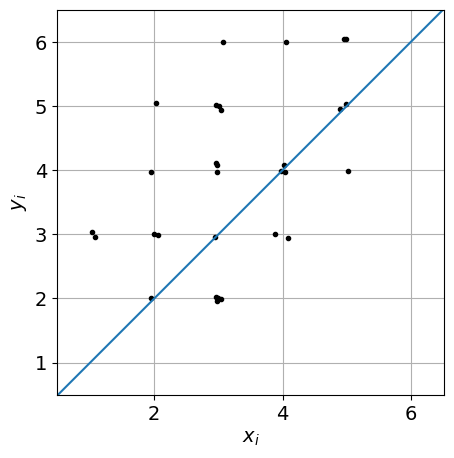

In [23]:
np.random.seed(1); jitx_i = stats.norm(scale=0.05).rvs(n); jity_i = stats.norm(scale=0.05).rvs(n)
plt.figure().set_size_inches(5,5);
plt.plot(x_i+jitx_i,y_i+jity_i,'k.');plt.plot([0.5,6.5],[0.5,6.5]);
plt.xlabel(r'$x_i$');plt.ylabel(r'$y_i$');plt.grid(True);plt.axis('equal');plt.xlim(0.5,6.5);plt.ylim(0.5,6.5);

We can see by eye that there are more points with $y_i>x_i$ than $y_i<x_i$.

In [24]:
nplus = np.sum(x_i<y_i); nminus = np.sum(x_i>y_i); nplus, nminus

(16, 7)

In [25]:
npm = nplus + nminus; npm

23

Of the original $n=30$ matched pairs, we have $n_{+}=16$ with $y_i>x_i$ and $n_{-}=7$ with $y_i<x_i$ for a total of $n_{\pm}=23$ non-tied pairs.  We ignore the seven ties and proceed with $\operatorname{Bin}(23,0.5)$ as our null distribution.  The probability of getting 16 or more positive results out of 23 non-zero is

In [26]:
stats.binom(npm,0.5).sf(nplus-0.5)

0.04656982421875

For a two-sided test, the $p$-value is twice this, or $0.093$:

In [27]:
2*stats.binom(npm,0.5).sf(nplus-0.5)

0.0931396484375

We could also use the normal approximation:

In [28]:
mu = 0.5*npm; sigma = 0.5*np.sqrt(npm)
mu, sigma

(11.5, 2.3979157616563596)

In [29]:
z = (nplus - 0.5 - mu)/sigma; z

1.6681153124565982

In [30]:
2*stats.norm.sf(z)

0.09529283802345664

We see that the $p$-value is pretty close to the exact one ($0.095$ vs $0.093$), but it would not be so if we had **not** used the continuity correction:

In [31]:
znocont = (nplus - mu)/sigma; znocont

1.876629726513673

In [32]:
2*stats.norm.sf(znocont)

0.06056886020265737

## One-Sample Sign Test

Note that while the sign test is defined in the context of matched pairs, since all it uses are the differences $d_i=y_i-x_i$, it could also be reformulated as a one-sample test where only $d_i$ are provided.